#**PCB Defects Detection**#

##**Data PreProcessing:**

In [ ]:
#-----Importing necesssary libraries-----
import os
from glob import glob
import pandas as pd
from functools import reduce
from xml.etree import ElementTree as et

####**Connecting Google Drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()

Mounted at /content/drive


'/content'

In [ ]:
#-----Load all xml files and store in a list-----
xml_list = glob('/content/drive/MyDrive/Dataset/*.xml')
#---glob() function gets all files of given extension in specified directory '/' for folder '*' for file---

In [ ]:
xml_list

['/content/drive/MyDrive/Dataset/01_missing_hole_15.xml',
 '/content/drive/MyDrive/Dataset/01_open_circuit_02.xml',
 '/content/drive/MyDrive/Dataset/04_missing_hole_12.xml',
 '/content/drive/MyDrive/Dataset/06_mouse_bite_01.xml',
 '/content/drive/MyDrive/Dataset/01_missing_hole_17.xml',
 '/content/drive/MyDrive/Dataset/11_missing_hole_03.xml',
 '/content/drive/MyDrive/Dataset/01_open_circuit_09.xml',
 '/content/drive/MyDrive/Dataset/11_mouse_bite_01.xml',
 '/content/drive/MyDrive/Dataset/04_missing_hole_03.xml',
 '/content/drive/MyDrive/Dataset/04_mouse_bite_16.xml',
 '/content/drive/MyDrive/Dataset/04_open_circuit_14.xml',
 '/content/drive/MyDrive/Dataset/04_missing_hole_19.xml',
 '/content/drive/MyDrive/Dataset/11_mouse_bite_10.xml',
 '/content/drive/MyDrive/Dataset/08_open_circuit_01.xml',
 '/content/drive/MyDrive/Dataset/07_mouse_bite_06.xml',
 '/content/drive/MyDrive/Dataset/06_missing_hole_02.xml',
 '/content/drive/MyDrive/Dataset/06_missing_hole_06.xml',
 '/content/drive/MyDrive

####**Read All XML Files:**

In [ ]:
#-----Read xml files-----
#---From each xml file we need to extract---
#---filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_info(filename):
  tree = et.parse(filename)   # Analyze xml document and creates a tree like structure.
  root = tree.getroot()   # Get root element e.g annotation

  #---Extract filename---
  image_name  = root.find('filename').text   # Get image name
  #---Extract width and height of image---
  width = root.find('size').find('width').text
  height = root.find('size').find('height').text
  #---Extract object(name, xmin, xmax, ymin, ymax)---
  objs = root.findall('object')
  parser = []
  for obj in objs:
    name = obj.find('name').text   # Extracting text content of element
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    xmax = bndbox.find('xmax').text
    ymin = bndbox.find('ymin').text
    ymax = bndbox.find('ymax').text
    parser.append([image_name, width, height, name, xmin, xmax, ymin, ymax])
  return parser

In [ ]:
#------Make a lsit and itrate through each element in "xml_list"-----
parser_all = list(map(extract_info, xml_list))   # functools

In [ ]:
parser_all

[[['01_missing_hole_15.jpg',
   '3034',
   '1586',
   'missing_hole',
   '2075',
   '2139',
   '1034',
   '1087'],
  ['01_missing_hole_15.jpg',
   '3034',
   '1586',
   'missing_hole',
   '2470',
   '2526',
   '1105',
   '1158'],
  ['01_missing_hole_15.jpg',
   '3034',
   '1586',
   'missing_hole',
   '2077',
   '2135',
   '514',
   '572']],
 [['01_open_circuit_02.jpg',
   '3034',
   '1586',
   'open_circuit',
   '1502',
   '1539',
   '1349',
   '1378'],
  ['01_open_circuit_02.jpg',
   '3034',
   '1586',
   'open_circuit',
   '1653',
   '1684',
   '1196',
   '1229'],
  ['01_open_circuit_02.jpg',
   '3034',
   '1586',
   'open_circuit',
   '775',
   '808',
   '1127',
   '1165']],
 [['04_missing_hole_12.jpg',
   '3056',
   '2464',
   'missing_hole',
   '1650',
   '1721',
   '750',
   '826'],
  ['04_missing_hole_12.jpg',
   '3056',
   '2464',
   'missing_hole',
   '326',
   '402',
   '802',
   '864'],
  ['04_missing_hole_12.jpg',
   '3056',
   '2464',
   'missing_hole',
   '177',
   '250'

In [ ]:
#-----Data in 2 x 2 Format-----
data = reduce(lambda x, y : x+y, parser_all)   # We use reduce function to convert 3 x 3 matrix into 2 x 2 matrix (rows and columns), functools

In [ ]:
data

[['01_missing_hole_15.jpg',
  '3034',
  '1586',
  'missing_hole',
  '2075',
  '2139',
  '1034',
  '1087'],
 ['01_missing_hole_15.jpg',
  '3034',
  '1586',
  'missing_hole',
  '2470',
  '2526',
  '1105',
  '1158'],
 ['01_missing_hole_15.jpg',
  '3034',
  '1586',
  'missing_hole',
  '2077',
  '2135',
  '514',
  '572'],
 ['01_open_circuit_02.jpg',
  '3034',
  '1586',
  'open_circuit',
  '1502',
  '1539',
  '1349',
  '1378'],
 ['01_open_circuit_02.jpg',
  '3034',
  '1586',
  'open_circuit',
  '1653',
  '1684',
  '1196',
  '1229'],
 ['01_open_circuit_02.jpg',
  '3034',
  '1586',
  'open_circuit',
  '775',
  '808',
  '1127',
  '1165'],
 ['04_missing_hole_12.jpg',
  '3056',
  '2464',
  'missing_hole',
  '1650',
  '1721',
  '750',
  '826'],
 ['04_missing_hole_12.jpg',
  '3056',
  '2464',
  'missing_hole',
  '326',
  '402',
  '802',
  '864'],
 ['04_missing_hole_12.jpg',
  '3056',
  '2464',
  'missing_hole',
  '177',
  '250',
  '1144',
  '1213'],
 ['06_mouse_bite_01.jpg',
  '2868',
  '2316',
  '

####**Converting Dataset into pandas Dataframe:**

In [ ]:
#-----Converting data in pandas dataframe-----
df = pd.DataFrame(data, columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])

In [ ]:
df

,filename,width,height,name,xmin,xmax,ymin,ymax
0,01_missing_hole_15.jpg,3034,1586,missing_hole,2075,2139,1034,1087
1,01_missing_hole_15.jpg,3034,1586,missing_hole,2470,2526,1105,1158
2,01_missing_hole_15.jpg,3034,1586,missing_hole,2077,2135,514,572
3,01_open_circuit_02.jpg,3034,1586,open_circuit,1502,1539,1349,1378
4,01_open_circuit_02.jpg,3034,1586,open_circuit,1653,1684,1196,1229
...,...,...,...,...,...,...,...,...
2948,09_spurious_copper_08.jpg,2775,2159,spurious_copper,1159,1289,827,894
2949,09_spurious_copper_08.jpg,2775,2159,spurious_copper,1784,1849,1204,1327
2950,09_spurious_copper_08.jpg,2775,2159,spurious_copper,1522,1692,922,994
2951,09_spurious_copper_08.jpg,2775,2159,spurious_copper,2256,2364,1027,1086


In [ ]:
#-----Checking if their is any null value in dataset-----
df.isnull()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2948,False,False,False,False,False,False,False,False
2949,False,False,False,False,False,False,False,False
2950,False,False,False,False,False,False,False,False
2951,False,False,False,False,False,False,False,False


In [ ]:
#-----Counting unique values in 'name' column-----
df['name'].value_counts()   # How many defects are there...?

spurious_copper    503
missing_hole       497
mouse_bite         492
short              491
spur               488
open_circuit       482
Name: name, dtype: int64

In [ ]:
df.info()   # Summary of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2953 non-null   object
 1   width     2953 non-null   object
 2   height    2953 non-null   object
 3   name      2953 non-null   object
 4   xmin      2953 non-null   object
 5   xmax      2953 non-null   object
 6   ymin      2953 non-null   object
 7   ymax      2953 non-null   object
dtypes: object(8)
memory usage: 184.7+ KB


In [ ]:
#-----Type conversion-----
#---Doing this to convert our data into YOLO format---
cols = ['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2953 non-null   object
 1   width     2953 non-null   int64 
 2   height    2953 non-null   int64 
 3   name      2953 non-null   object
 4   xmin      2953 non-null   int64 
 5   xmax      2953 non-null   int64 
 6   ymin      2953 non-null   int64 
 7   ymax      2953 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 184.7+ KB


**Formulas for calculating variables according to YOLO format:**

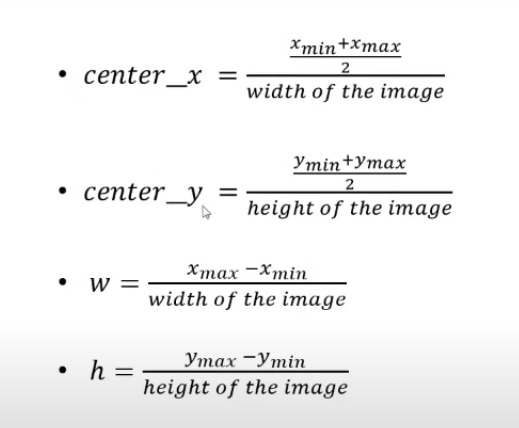

In [ ]:
#-----Calculating center_x and center_y-----
df['center_x'] = ((df['xmax'] + df['xmin']) / 2) / df['width']
df['center_y'] = ((df['ymax'] + df['ymin']) / 2) / df['height']
#---w---
df['w'] = (df['xmax'] - df['xmin']) / df['width']
#---h---
df['h'] = (df['ymax'] - df['ymin']) / df['height']

In [ ]:
df.head()
#---'center_x' & 'center_y' represents center of bounding box where as 'w' and 'h' represents width and height of bounding box---

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,01_missing_hole_15.jpg,3034,1586,missing_hole,2075,2139,1034,1087,0.694463,0.668663,0.021094,0.033417
1,01_missing_hole_15.jpg,3034,1586,missing_hole,2470,2526,1105,1158,0.823336,0.713430,0.018457,0.033417
2,01_missing_hole_15.jpg,3034,1586,missing_hole,2077,2135,514,572,0.694133,0.342371,0.019117,0.036570
3,01_open_circuit_02.jpg,3034,1586,open_circuit,1502,1539,1349,1378,0.501154,0.859710,0.012195,0.018285
4,01_open_circuit_02.jpg,3034,1586,open_circuit,1653,1684,1196,1229,0.549934,0.764502,0.010218,0.020807


####**Split data into train and test:**

In [ ]:
#-----Counting number of images in dataset-----
images = df['filename'].unique()
len(images)

693

In [ ]:
#-----Convert images into pandas data frame----
img_df = pd.DataFrame(images, columns = ['filename'])

In [ ]:
img_df

,filename
0,01_missing_hole_15.jpg
1,01_open_circuit_02.jpg
2,04_missing_hole_12.jpg
3,06_mouse_bite_01.jpg
4,01_missing_hole_17.jpg
...,...
688,08_spurious_copper_09.jpg
689,08_spurious_copper_05.jpg
690,05_spurious_copper_06.jpg
691,11_spurious_copper_01.jpg


In [ ]:
#-----80 % trian and 20 % test-----
img_train = tuple(img_df.sample(frac = 0.8)['filename'])   # pandas
#---.query() function filter and select rows where images of 'img_train' are not present---
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename'])   # pandas
print('Train images are: ', len(img_train))
print('Test images are: ', len(img_test))

Train images are:  554
Test images are:  139


In [ ]:
train_df = df.query(f'filename in {img_train}')   # train dataframe
test_df = df.query(f'filename in {img_test}')   # test dataframe

In [ ]:
train_df

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,01_missing_hole_15.jpg,3034,1586,missing_hole,2075,2139,1034,1087,0.694463,0.668663,0.021094,0.033417
1,01_missing_hole_15.jpg,3034,1586,missing_hole,2470,2526,1105,1158,0.823336,0.713430,0.018457,0.033417
2,01_missing_hole_15.jpg,3034,1586,missing_hole,2077,2135,514,572,0.694133,0.342371,0.019117,0.036570
3,01_open_circuit_02.jpg,3034,1586,open_circuit,1502,1539,1349,1378,0.501154,0.859710,0.012195,0.018285
4,01_open_circuit_02.jpg,3034,1586,open_circuit,1653,1684,1196,1229,0.549934,0.764502,0.010218,0.020807
...,...,...,...,...,...,...,...,...,...,...,...,...
2948,09_spurious_copper_08.jpg,2775,2159,spurious_copper,1159,1289,827,894,0.441081,0.398564,0.046847,0.031033
2949,09_spurious_copper_08.jpg,2775,2159,spurious_copper,1784,1849,1204,1327,0.654595,0.586151,0.023423,0.056971
2950,09_spurious_copper_08.jpg,2775,2159,spurious_copper,1522,1692,922,994,0.579099,0.443724,0.061261,0.033349
2951,09_spurious_copper_08.jpg,2775,2159,spurious_copper,2256,2364,1027,1086,0.832432,0.489347,0.038919,0.027327


In [ ]:
test_df

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
6,04_missing_hole_12.jpg,3056,2464,missing_hole,1650,1721,750,826,0.551538,0.319805,0.023233,0.030844
7,04_missing_hole_12.jpg,3056,2464,missing_hole,326,402,802,864,0.119110,0.338068,0.024869,0.025162
8,04_missing_hole_12.jpg,3056,2464,missing_hole,177,250,1144,1213,0.069863,0.478287,0.023887,0.028003
39,04_missing_hole_19.jpg,3056,2464,missing_hole,1288,1341,1535,1601,0.430137,0.636364,0.017343,0.026786
40,04_missing_hole_19.jpg,3056,2464,missing_hole,1517,1571,1648,1715,0.505236,0.682427,0.017670,0.027192
...,...,...,...,...,...,...,...,...,...,...,...,...
2938,05_spurious_copper_06.jpg,2544,2156,spurious_copper,1810,1977,1345,1401,0.744300,0.636827,0.065645,0.025974
2939,05_spurious_copper_06.jpg,2544,2156,spurious_copper,1933,2056,363,412,0.784002,0.179731,0.048349,0.022727
2940,05_spurious_copper_06.jpg,2544,2156,spurious_copper,1519,1649,653,706,0.622642,0.315167,0.051101,0.024583
2941,05_spurious_copper_06.jpg,2544,2156,spurious_copper,1877,1980,782,824,0.758058,0.372449,0.040487,0.019481


####**Labelling Images:**

In [ ]:
#-----Labelling Image------
def label_img(x):
  labels = {'missing_hole': 0, 'mouse_bite': 1, 'open_circuit': 2, 'short': 3, 'spur': 4, 'spurious_copper': 5}
  return labels[x]

In [ ]:
train_df = train_df.copy()   # pandas
train_df['id'] = train_df['name'].apply(label_img)   # Creating new column 'id' in 'train_df'

test_df = test_df.copy()   # pandas
test_df['id'] = test_df['name'].apply(label_img)   # Creating new column 'id' in 'test_df'

In [ ]:
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,01_missing_hole_15.jpg,3034,1586,missing_hole,2075,2139,1034,1087,0.694463,0.668663,0.021094,0.033417,0
1,01_missing_hole_15.jpg,3034,1586,missing_hole,2470,2526,1105,1158,0.823336,0.713430,0.018457,0.033417,0
2,01_missing_hole_15.jpg,3034,1586,missing_hole,2077,2135,514,572,0.694133,0.342371,0.019117,0.036570,0
3,01_open_circuit_02.jpg,3034,1586,open_circuit,1502,1539,1349,1378,0.501154,0.859710,0.012195,0.018285,2
4,01_open_circuit_02.jpg,3034,1586,open_circuit,1653,1684,1196,1229,0.549934,0.764502,0.010218,0.020807,2


In [ ]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
6,04_missing_hole_12.jpg,3056,2464,missing_hole,1650,1721,750,826,0.551538,0.319805,0.023233,0.030844,0
7,04_missing_hole_12.jpg,3056,2464,missing_hole,326,402,802,864,0.119110,0.338068,0.024869,0.025162,0
8,04_missing_hole_12.jpg,3056,2464,missing_hole,177,250,1144,1213,0.069863,0.478287,0.023887,0.028003,0
39,04_missing_hole_19.jpg,3056,2464,missing_hole,1288,1341,1535,1601,0.430137,0.636364,0.017343,0.026786,0
40,04_missing_hole_19.jpg,3056,2464,missing_hole,1517,1571,1648,1715,0.505236,0.682427,0.017670,0.027192,0


####**Assign Data in YOLO Format:**

In [ ]:
import os
from shutil import move

In [ ]:
train_folder = '/content/drive/MyDrive/Dataset/train'
test_folder = '/content/drive/MyDrive/Dataset/test'

#---Making directory---
#os.mkdir(train_folder)
#os.mkdir(test_folder)

In [ ]:
cols = ['filename', 'id', 'center_x', 'center_y', 'w', 'h']
#---Group by class-----
groupby_obj_train = train_df[cols].groupby('filename')   # pandas
groupby_obj_test = test_df[cols].groupby('filename')

In [ ]:
groupby_obj_train

In [ ]:
groupby_obj_test

In [ ]:
#groupby_obj_train.get_group('08_short_05.jpg').set_index('filename').to_csv('sample.txt', index = False, header = False)

In [ ]:
def save_data(filename, folder_path, group_obj):
    # Move Images
    src = os.path.join('/content/drive/MyDrive/Dataset', filename)
    dst = os.path.join(folder_path, filename)
    move(src, dst)   # Move Images to destination folder, shutil

    # Save the labels
    text_filename = os.path.join(folder_path, os.path.splitext(filename)[0] + ".txt")

    # Assuming 'filename' column always exists
    group_df = group_obj.get_group(filename)   # Get the group of rows corresponding to specified filename
    group_df.set_index('filename').to_csv(text_filename, sep=' ', index=False, header=False)   # Writes data to csv file
    print(f"Data saved successfully for {filename}")

In [ ]:
#-----Images and their respective files in the train folder-----
filename_series = pd.Series(groupby_obj_train.groups.keys())
filename_series.apply(save_data, args=(train_folder, groupby_obj_train))

Data saved successfully for 01_missing_hole_01.jpg
Data saved successfully for 01_missing_hole_03.jpg
Data saved successfully for 01_missing_hole_05.jpg
Data saved successfully for 01_missing_hole_06.jpg
Data saved successfully for 01_missing_hole_07.jpg
Data saved successfully for 01_missing_hole_08.jpg
Data saved successfully for 01_missing_hole_09.jpg
Data saved successfully for 01_missing_hole_11.jpg
Data saved successfully for 01_missing_hole_12.jpg
Data saved successfully for 01_missing_hole_15.jpg
Data saved successfully for 01_missing_hole_16.jpg
Data saved successfully for 01_missing_hole_17.jpg
Data saved successfully for 01_missing_hole_19.jpg
Data saved successfully for 01_missing_hole_20.jpg
Data saved successfully for 01_mouse_bite_01.jpg
Data saved successfully for 01_mouse_bite_02.jpg
Data saved successfully for 01_mouse_bite_03.jpg
Data saved successfully for 01_mouse_bite_04.jpg
Data saved successfully for 01_mouse_bite_05.jpg
Data saved successfully for 01_mouse_bite

0      None
1      None
2      None
3      None
4      None
       ... 
549    None
550    None
551    None
552    None
553    None
Length: 554, dtype: object

In [ ]:
#-----Images and their respective files in the test folder-----
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data, args=(test_folder, groupby_obj_test))

Data saved successfully for 01_missing_hole_02.jpg
Data saved successfully for 01_missing_hole_04.jpg
Data saved successfully for 01_missing_hole_10.jpg
Data saved successfully for 01_missing_hole_13.jpg
Data saved successfully for 01_missing_hole_14.jpg
Data saved successfully for 01_missing_hole_18.jpg
Data saved successfully for 01_mouse_bite_06.jpg
Data saved successfully for 01_mouse_bite_10.jpg
Data saved successfully for 01_mouse_bite_19.jpg
Data saved successfully for 01_open_circuit_08.jpg
Data saved successfully for 01_open_circuit_14.jpg
Data saved successfully for 01_open_circuit_15.jpg
Data saved successfully for 01_open_circuit_19.jpg
Data saved successfully for 01_short_01.jpg
Data saved successfully for 01_short_03.jpg
Data saved successfully for 01_short_04.jpg
Data saved successfully for 01_short_16.jpg
Data saved successfully for 01_spur_03.jpg
Data saved successfully for 01_spur_14.jpg
Data saved successfully for 01_spurious_copper_02.jpg
Data saved successfully for

0      None
1      None
2      None
3      None
4      None
       ... 
134    None
135    None
136    None
137    None
138    None
Length: 139, dtype: object